In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime
import calendar
import time
import matplotlib.pyplot as plt

In [3]:
def hitYahooFinance(ticker, start, end):
  link = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={start}&period2={end}&interval=1d&events=history'
  return pd.read_csv(link)

## <font color='blue'>Calculating simple Returns




> Ticker is PG

In [3]:
start = calendar.timegm(datetime.datetime(year = 1995, month = 1, day = 1).timetuple())
end = calendar.timegm(time.gmtime()) #current epoch time

PG = hitYahooFinance('PG', start, end)
PG.set_index('Date', inplace = True)
PG.shape

(7073, 6)

In [4]:
PG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.771256,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.708968,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.599948,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.615521,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.584374,1795200


In [5]:
PG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30,140.960007,142.119995,140.279999,141.009995,141.009995,6369300
2023-01-31,141.229996,142.470001,140.759995,142.380005,142.380005,9373400
2023-02-01,142.080002,144.100006,141.350006,143.190002,143.190002,7207900
2023-02-02,142.169998,142.710007,141.210007,142.169998,142.169998,6444300
2023-02-03,142.779999,143.380005,141.169998,142.610001,142.610001,5993100


<font color='green'>
We will be using Adjusted Close price to compute the Simple return

$P_0$ = Price on Day 0 (the first day we buy the stock)
<br>
$P_1$ = Price on Day 1


> $ SimpleRetrun = \frac{P_1-P_0}{P_0}$

$=> SimpleRetrun= \frac{P_1}{P_0} - 1$

In [ ]:
PG['Simple_Return'] = (PG['Adj Close']/ PG['Adj Close'].shift(1))-1

In [ ]:
PG['Simple_Return']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2023-01-23   -0.013429
2023-01-24    0.005459
2023-01-25   -0.000705
2023-01-26   -0.004022
2023-01-27   -0.004109
Name: Simple_Return, Length: 7068, dtype: float64

In [ ]:
PG['Simple_Return'].plot(figsize=(8,5))
plt.show()

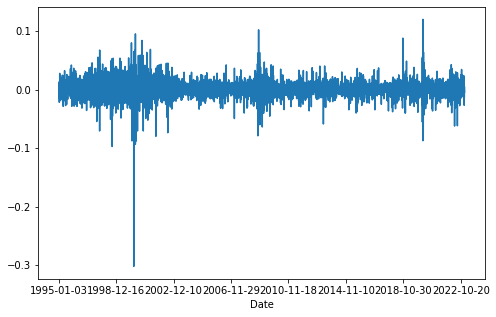

In [ ]:
PG['Simple_Return'].plot(figsize=(8,5))

#### Average retruns on daily basis

In [ ]:
avg_returns_d = PG['Simple_Return'].mean()
avg_returns_d

0.00050968267865591588

#### Average return on Annual basis

In [ ]:
avg_returns_a = PG['Simple_Return'].mean()*250 #250 is because just by considering working days
avg_returns_a

0.12742066966397897

In [ ]:
print(f"Annual rate of return for PG is {str(round(avg_returns_a, 5)*100)+'%'}")

Annual rate of return for PG is 12.742%


##<font color='blue'> Log Returns </font>

$ LogRetrun = \ln (\frac{P_t}{P_{t-1}})$
### <font color="Red"> Note 


*   We see that Log rate of retrun extensively resembles the simple rate of return. 
*   In general, it is preferable to use simple returns when we calculate the returns of multiple securites over a same period.

*   Log retruns are a better choice when we have only one security and calculated its retrun over multiple time periods.







In [ ]:
PG['Log_return'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
PG['Log_return']

Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2023-01-23   -0.013520
2023-01-24    0.005444
2023-01-25   -0.000705
2023-01-26   -0.004030
2023-01-27   -0.004117
Name: Log_return, Length: 7068, dtype: float64

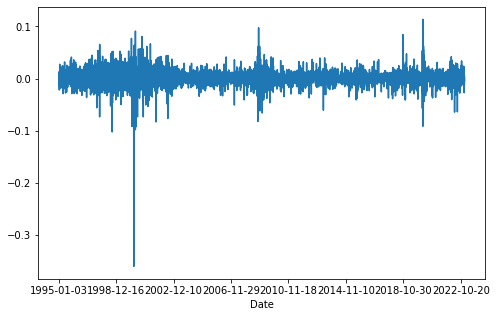

In [ ]:
PG['Log_return'].plot(figsize=(8,5))

In [ ]:
# Daily Log Return
log_returns_d = PG['Log_return'].mean()
log_returns_d

0.00040968916396576553

In [ ]:
#Anual Log return
log_returns_a = PG['Log_return'].mean()*250
log_returns_a

0.10242229099144139

In [ ]:
print(f"Annual rate of return for PG is {str(round(log_returns_a, 5)*100)+'%'}")

Annual rate of return for PG is 10.242%


## <font color="Blue">Calculating the Returns on a portifoli of securities

In [6]:
start = calendar.timegm(datetime.datetime(year = 1995, month = 1, day = 1).timetuple())
end = calendar.timegm(time.gmtime()) #current epoch time

In [7]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
mydata['Date'] = hitYahooFinance('PG', start, end)['Date'] #doing this just for getting the date column
for t in tickers:
  mydata[t] = hitYahooFinance(t, start, end)['Adj Close']

In [8]:
mydata.set_index('Date', inplace = True)

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7073 entries, 1995-01-03 to 2023-02-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7073 non-null   float64
 1   MSFT    7073 non-null   float64
 2   F       7073 non-null   float64
 3   GE      7073 non-null   float64
dtypes: float64(4)
memory usage: 276.3+ KB


In [10]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.771257,2.352808,4.220634,25.555304
1995-01-04,7.708967,2.369910,4.334193,25.555304
1995-01-05,7.599949,2.330821,4.296340,25.617952
1995-01-06,7.615520,2.369910,4.296340,25.492676
1995-01-09,7.584372,2.355251,4.372048,25.242121


In [11]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2023-01-30,141.009995,242.710007,12.89,80.830002
2023-01-31,142.380005,247.809998,13.51,80.480003
2023-02-01,143.190002,252.750000,13.79,82.320000
2023-02-02,142.169998,264.600006,14.32,83.940002
2023-02-03,142.610001,258.350006,13.23,81.959999


#### Normalization to 100
$\frac{P_t}{P_0}*100$

In [12]:
mydata.iloc[0]

PG       7.771257
MSFT     2.352808
F        4.220634
GE      25.555304
Name: 1995-01-03, dtype: float64

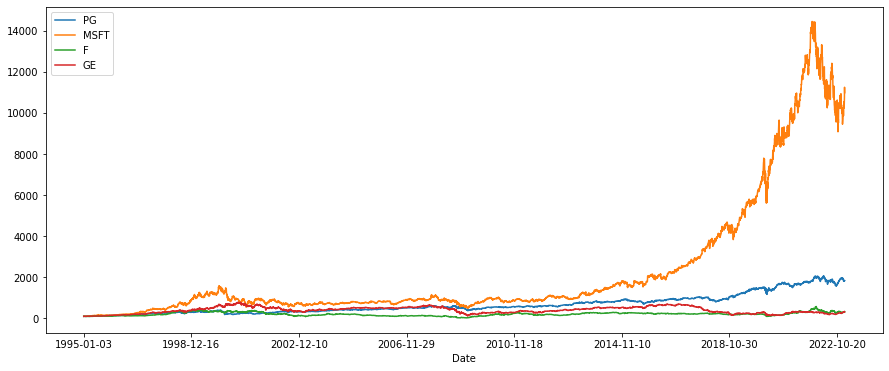

In [13]:
(mydata/ mydata.iloc[0]*100).plot(figsize = (15, 6))

The reason behind Normalizing is, all the graphs are starting at 100 on Y-axis (it seems like 0 but, it is 100 on Y-axis). This allows us to compare the behaviour of the 4 different stocks, as if they all starting from same value 100. If we dont do this, we will see the Adjusted closing prices of all the companies plotted directed as seen below. By that, we will not have a good landmark

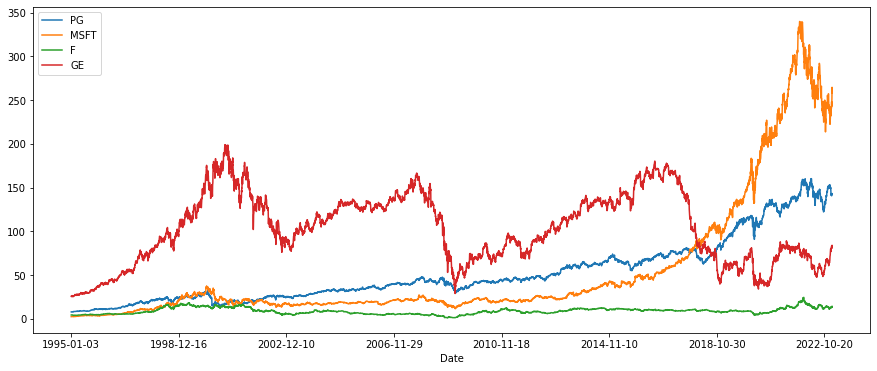

In [14]:
mydata.plot(figsize = (15, 6))

In [15]:
returns = (mydata/mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016494,-0.008734,0.002451
1995-01-06,0.002049,0.016770,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009829


We are using simple retruns, as, it is preferred if we are working with multiple stocks over same period

### Portfolio_1

In [16]:
weights = np.array([0.25, 0.25, 0.25, 0.25]) #Portifolio weights should always sum up to 1

In [18]:
annual_returns = returns.mean()*250
annual_returns

PG      0.127843
MSFT    0.215568
F       0.121673
GE      0.092864
dtype: float64

In [19]:
np.dot(annual_returns, weights)

0.13948705458892896

In [21]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5)*100)+'%'
print(f"Portifoli_1 return : {pfolio_1}")

Portifoli_1 return : 13.949%


### Portfolio_2

In [22]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5)*100)+'%'
print(f"Portifoli_1 return : {pfolio_2}")

Portifoli_1 return : 16.026%


# <font color="Blue"> Calculating the Returns of Indices

Top US Market indices are 

*   S&P 500 (True approximation of US stock market)
*   Dowjones Industrial average (It has 30 large equally weighted public stocks; Not a true represetation of US stock market)
*   NASDAQ composite index (Most of them are IT companies)



> Morgan Stanley MSCI is a global indices that icludes stocks from all developed markets in the world.

If you think your stock is performing well, compare it with a stock indices (S&P 500) to observe how really good your stock is performing.







In [23]:
start = calendar.timegm(datetime.datetime(year = 1997, month = 1, day = 1).timetuple())
end = calendar.timegm(time.gmtime()) #current epoch time

In [29]:
# "%5EGSPC" is S&P 500
# "^IXIC" is NASDAQ Composite
# "%5EGDAXI" is DAX PERFORMANCE-INDEX (^GDAXI)
# "^FTSE" is FTSE 100

tickers = ['%5EGSPC', '^IXIC', '%5EGDAXI', '^FTSE']

ind_data = pd.DataFrame()
ind_data['Date'] = hitYahooFinance('PG', start, end)['Date'] #doing this just for getting the date column
for t in tickers:
  ind_data[t] = hitYahooFinance(t, start, end)['Adj Close']

In [41]:
ind_data.set_index('Date', inplace = True)

In [42]:
ind_data.head()

,%5EGSPC,^IXIC,%5EGDAXI,^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000


In [43]:
ind_data.tail()

,%5EGSPC,^IXIC,%5EGDAXI,^FTSE
Date,,,,
2023-01-30,4017.770020,11393.809570,13700.929688,7237.799805
2023-01-31,4076.600098,11584.549805,13694.509766,7262.100098
2023-02-01,4119.209961,11816.320313,13795.849609,7351.100098
2023-02-02,4179.759766,12200.820313,13816.610352,7473.000000
2023-02-03,4136.479980,12006.950195,13910.120117,7385.899902


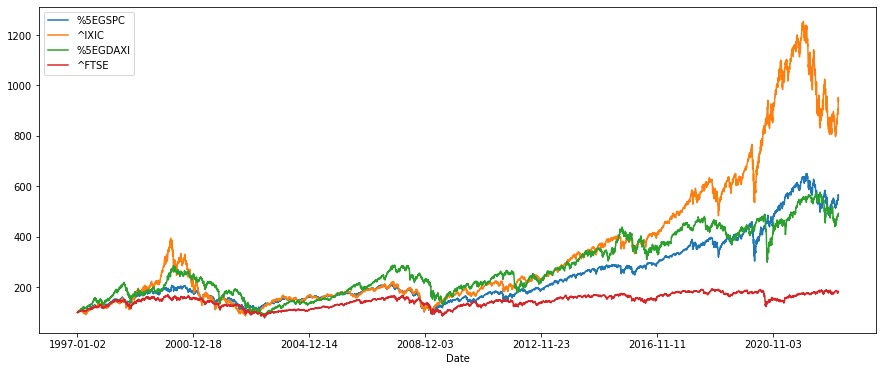

In [44]:
(ind_data/ ind_data.iloc[0]*100).plot(figsize = (15, 6))

In [45]:
ind_returns = (ind_data/ ind_data.shift(1))-1
ind_returns.tail()

,%5EGSPC,^IXIC,%5EGDAXI,^FTSE
Date,,,,
2023-01-30,-0.012969,-0.019610,0.012262,-0.008575
2023-01-31,0.014642,0.016741,-0.000469,0.003357
2023-02-01,0.010452,0.020007,0.007400,0.012255
2023-02-02,0.014699,0.032540,0.001505,0.016583
2023-02-03,-0.010355,-0.015890,0.006768,-0.011655


In [46]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

%5EGSPC     0.085039
^IXIC       0.117105
%5EGDAXI    0.081293
^FTSE       0.037802
dtype: float64

### Now lets compare our stock performance with Indices

In [51]:
start = calendar.timegm(datetime.datetime(year = 2007, month = 1, day = 1).timetuple())
end = calendar.timegm(time.gmtime()) #current epoch time

tickers = ["PG", "%5EGSPC", "^DJI"] #DJI is Dow Jones

data_2 = pd.DataFrame()
data_2['Date'] = hitYahooFinance('PG', start, end)['Date'] #doing this just for getting the date column
for t in tickers:
  data_2[t] = hitYahooFinance(t, start, end)['Adj Close']

data_2.set_index('Date', inplace = True)

In [52]:
data_2.tail()

,PG,%5EGSPC,^DJI
Date,,,
2023-01-30,141.009995,4017.770020,33717.089844
2023-01-31,142.380005,4076.600098,34086.039063
2023-02-01,143.190002,4119.209961,34092.960938
2023-02-02,142.169998,4179.759766,34053.941406
2023-02-03,142.610001,4136.479980,33926.011719


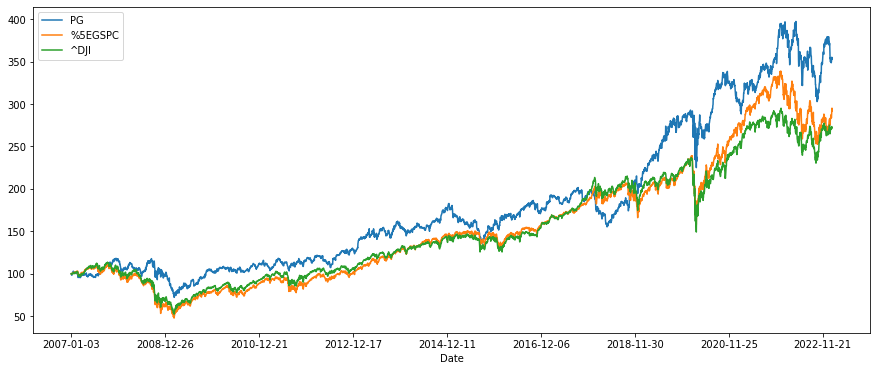

In [53]:
(data_2 / data_2.iloc[0]*100).plot(figsize = (15,6))

# <font color = "blue"> Measuring security Risk

Risk and Returns are the two important dimensions in the investment decision making.


> Example: If you invested $1000 on a stock exchange and you know that on average, it makes 15% returns, you would want to know how the average was made? <br> 
>*   Scenario 1: Over the last 4 years its  rate of returns looks like **+14%, +16%, +13% and +17%**
>*   Scenario 2: Over the last 4 years its  rate of returns looks like **+50%, -20%, -20%, +50%**



*   In the scenario 1, your money will earn a stable amount over time. The rate of return is always 13 to 17%

*   In scenario 2, there is a huge variablity between two consecutive years even though the average returns are same. If you were an invester who hold this stock during years 2 and 3, you lost 40% of the stock value.

**Variability is the best measure of risk**

Investers don't like surprises and risks. Their main goal is to measure the risk they may face and reduce it as much as possible.



> <font color = "Green"> Statestical measures to quantify the risk are **Variance** and **Standard Deviation**</font>

**Variance** ($S^{2}$) : It measures the dispersion of a set of data points around the mean


$ S^{2} = \frac{\sum (X - \bar{X})^{2}}{N-1} $
<br>
$\bar{X} $ is the Mean(X) 

**Standard Deviation** : $S = \sqrt{S^{2}}$

*   Variance of Scenario 1 is 0.00033, Standard deviation is 1.8%
*   Variance of Scenario 2 is 0.16, Standard deviation is 40%. --> <font color = "Red"> It is lot riskier






In [4]:
start = calendar.timegm(datetime.datetime(year = 2007, month = 1, day = 1).timetuple())
end = calendar.timegm(time.gmtime()) #current epoch time

tickers = ['PG', 'BEI.DE']

sec_data = pd.DataFrame()
sec_data['Date'] = hitYahooFinance('PG', start, end)['Date'] #doing this just for getting the date column
for t in tickers:
  sec_data[t] = hitYahooFinance(t, start, end)['Adj Close']

sec_data.set_index('Date', inplace = True)

In [6]:
sec_data.tail()

,PG,BEI.DE
Date,,
2023-01-30,141.009995,106.800003
2023-01-31,142.380005,105.949997
2023-02-01,143.190002,107.449997
2023-02-02,142.169998,106.599998
2023-02-03,142.610001,108.500000


we are using logerthimatic returns as we will examine each company seperately in a given time frame and this approach will tell us more about the behaviour of the stock

In [5]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.002191
2007-01-05,-0.008625,0.006545
2007-01-08,0.002202,-0.020772
2007-01-09,-0.002517,0.000202
...,...,...
2023-01-30,0.003125,0.013195
2023-01-31,0.009669,-0.007991
2023-02-01,0.005673,0.014058


### PG

In [8]:
sec_returns['PG'].mean()

0.00031185986689490487

In [9]:
sec_returns['PG'].mean() * 250

0.07796496672372621

In [10]:
sec_returns['PG'].std()

0.01185385585719417

In [11]:
sec_returns['PG'].std()*250**0.5 #square root

0.18742591782030607

### Beiersdorf

In [12]:
sec_returns['BEI.DE'].mean()

0.0002468416560326579

In [13]:
sec_returns['BEI.DE'].mean()*250

0.06171041400816448

In [14]:
sec_returns['BEI.DE'].std()

0.013643659905812228

In [15]:
sec_returns['BEI.DE'].std()*250**0.5 #square root

0.2157252046154251

Beiersdorf has higher volatility

# <font color = "blue">Benifits of Diversification 

Share prices are influenced by state of the economy. But, different industries are infulenced in a different way. 
<br>*For instance, at the time of crisis, who will suffer most between car makers or super markerts.. People can easily postpone buying a new car but can't postpone their grocery Shopping*

**Its better to invest in companies operating in different industries**



> There is a relationship between the prices of different companies. It is very importnat to understand what causes this relationship. This activity helps us optimize investment portfolios.



### Measuring the relationship between stocks


> The correlation coefficient measures the relationship between two stocks
<br>
$\rho _{x, y} = \frac{(x-\bar{x})*(y-\bar{y})}{\sigma _{x}\sigma _{y}}$
*  x, y are two stocks
*  $\bar{x}, \bar{y}$ are mean values


### Covariance and Correlation

In [6]:
PG_var = sec_returns['PG'].var()
PG_var

0.0001405138913581061

In [7]:
BEI_var = sec_returns['BEI.DE'].var()
BEI_var

0.00018614949782778055

In [8]:
PG_var_a = sec_returns['PG'].var()*250
PG_var_a

0.035128472839526526

In [9]:
BEI_var_a = sec_returns['BEI.DE'].var()*250
BEI_var_a

0.04653737445694514

In [10]:
cov_matrix = sec_returns.cov()
cov_matrix

,PG,BEI.DE
PG,1.405139e-04,-2.319855e-07
BEI.DE,-2.319855e-07,1.861495e-04


In [11]:
cov_matrix_a = sec_returns.cov()*250
cov_matrix_a

,PG,BEI.DE
PG,0.035128,-0.000058
BEI.DE,-0.000058,0.046537


In [12]:
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,-0.001434
BEI.DE,-0.001434,1.000000


<font color = "red"> Don't fall in the trap of annualizing the correlation table! </font>
<br> It does not contain daily average values. it shows us the relation between two variable, we don't need to multiply with 250

Above matrix is the correlation between retruns of the PG and BEI.DE stocks. It is not correlation between their prices

*  Correlation between stocks Prices : Focuses on stock <b>price levels</b>
*  Correlation between stocks returns : Reflects the dependence between prices at different times and focuses on the <b>returns</b> of your portfolio

As an investor, return is what we care about!!!


### Calculating Portfolio Risk

Equal weight Scheme

Portifolio Variance

In [13]:
weights = np.array([0.5, 0.5])

pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov()*250, weights))
pfolio_var

0.020387463631167817

Portifolio volatility

In [14]:
pfolio_vol = np.dot(weights.T, np.dot(sec_returns.cov()*250, weights)) ** 0.5
pfolio_vol

0.14278467575747691

In [15]:
print(str(round(pfolio_vol, 5)*100)+'%')

14.277999999999999%


Portifolio risk can be defined as sum of two compnonents i.e the variances of the securities contained in that portifolio and the products of the correlation between securities and their standard devations.
<br>
There are two types of investments risks


*   Systematic / un-diversifiable risk
*   un-systamatic / Diversifiable risk

<u><b>Un-diversifiable Risk</b></u> : This component depends on the variance of each individual security, it is also known as systematic risk. Regardless of the number of securities contained in a portifolio and relationship between these securities, this risk **can not be eliminated**. There are number of systematic risks that can't be diversified like *Recession of the economy, Low consumer spending, Wars, Forces of nature*. We have to accept this when investing. Nothing much can be done on this.

<u><b>Diversifiable Risk</b></u> : Idiosyncratic risk (also known as company specific risk). Driven by company specific events or Industry specific events. Academic research has shown that, diversifiable risk can be eliminated if we invest in non-correlated assets. *(Automotive, Construction, Energy, Technology)* S&P 500 is well diversified.

In [16]:
weights = np.array([0.5, 0.5])

### Diversifiable risk

Diversifiable risk = Portifolio Variance - Weighted annual variances

In [19]:
PG_var_a = sec_returns['PG'].var()*250
PG_var_a

0.035128472839526526

In [20]:
BEI_var_a = sec_returns['BEI.DE'].var()*250
BEI_var_a

0.04653737445694514

In [21]:
dr = pfolio_var - (weights[0]**2 * PG_var_a) - (weights[1]**2 * BEI_var_a)
dr

-2.8998192950099172e-05

In [22]:
print(f"Diversifiable risk : {round(dr*100, 3)}%")

Diversifiable risk : -0.003%


Non Diversifiable risk

In [27]:
#th reamaining part of portifolio variance is systematic risk
n_dr_1 = pfolio_var - dr
n_dr_1

0.020416461824117917

In [28]:
n_dr_2 = (weights[0] **2 * PG_var_a) + (weights[1] **2 * BEI_var_a)
n_dr_2

0.020416461824117917

In [29]:
n_dr_1 == n_dr_2

True

Regardless of we subract unsystematic risk from whole variance or we sum the annual variances, we obtain the same value.

# <font color = "blue"> Markowitz Portfolio Theory

Investers shouldn’t put all their eggs in one basket. <br> Markowitz proved the existance of an efficient set of portfolios that optimize the investers returns for the amount of risk they are willing to accept. Investment in multiple securities shouldn’t be analysed seperately but should be considered in a portfolio. 


> The combination of securities with little correlation allows the investors to optimize their return without assuming additional risk



In [30]:
start = calendar.timegm(datetime.datetime(year = 2010, month = 1, day = 1).timetuple())
end = calendar.timegm(time.gmtime()) #current epoch time

assets = ['PG', '%5EGSPC']

pf_data = pd.DataFrame()
pf_data['Date'] = hitYahooFinance('PG', start, end)['Date'] #doing this just for getting the date column
for t in assets:
  pf_data[t] = hitYahooFinance(t, start, end)['Adj Close']

pf_data.set_index('Date', inplace = True)

In [31]:
pf_data.tail()

,PG,%5EGSPC
Date,,
2023-01-30,141.009995,4017.770020
2023-01-31,142.380005,4076.600098
2023-02-01,143.190002,4119.209961
2023-02-02,142.169998,4179.759766
2023-02-03,142.610001,4136.479980


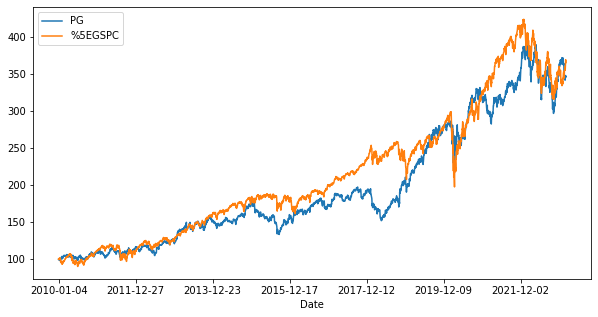

In [32]:
(pf_data/ pf_data.iloc[0] *100).plot(figsize = (10, 5))

In [33]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [35]:
log_returns.mean()*250

PG         0.094272
%5EGSPC    0.098284
dtype: float64

In [36]:
log_returns.cov()*250

,PG,%5EGSPC
PG,0.029986,0.017646
%5EGSPC,0.017646,0.031648


In [37]:
log_returns.corr()

,PG,%5EGSPC
PG,1.000000,0.572815
%5EGSPC,0.572815,1.000000


In [38]:
num_assets = len(assets)
num_assets

2

In [46]:
#generating two random weights whose sum is equal to 1
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.1163283, 0.8836717])

In [47]:
weights[0]+weights[1]

1.0

Expected portfolio return

It is given by sum of the weighted annualized average log returns.

In [48]:
np.sum(weights*log_returns.mean())*250

0.097816984875042

Expected Portfolio variance

In [49]:
np.dot(weights.T, np.dot(log_returns.cov()*250, weights))

0.0287464417813101

Expected Portfolio voltality

In [50]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))

0.16954775663897798

Now we are going to create 1000 different combinations of weights for the same assets

In [52]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
  weights = np.random.random(num_assets)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09778316, 0.09441442, 0.09533014, 0.09578976, 0.09785995,
        0.09607419, 0.09700576, 0.09517987, 0.0976583 , 0.0959513 ,
        0.09598057, 0.09632944, 0.0964076 , 0.09635855, 0.09747419,
        0.09549092, 0.09704582, 0.09578209, 0.09675135, 0.09680597,
        0.09530633, 0.09487486, 0.09609609, 0.0964831 , 0.09653316,
        0.09617569, 0.09752237, 0.09637429, 0.09665008, 0.09509678,
        0.09604946, 0.09568255, 0.09450365, 0.09671709, 0.09639382,
        0.09660473, 0.09565257, 0.09649005, 0.09565186, 0.09560549,
        0.09708489, 0.09666419, 0.09597057, 0.09540012, 0.0953456 ,
        0.09605985, 0.09644323, 0.09655456, 0.09692831, 0.09505825,
        0.0944228 , 0.09656657, 0.09433683, 0.09581941, 0.09626162,
        0.09536402, 0.09495432, 0.09662776, 0.09796554, 0.09459431,
        0.09637431, 0.09640649, 0.0975268 , 0.09444608, 0.09643424,
        0.09437597, 0.0945765 , 0.09730093, 0.09804859, 0.09654742,
        0.09534003, 0.09642848, 0.09659545, 0.09

In [53]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.097783,0.169008
1,0.094414,0.170717
2,0.095330,0.159089
3,0.095790,0.156266
4,0.097860,0.170246


In [54]:
portfolios.tail()

,Return,Volatility
995,0.096712,0.157223
996,0.095515,0.157696
997,0.095790,0.156265
998,0.096122,0.155584
999,0.096808,0.157830


Text(0, 0.5, 'Expected Return')

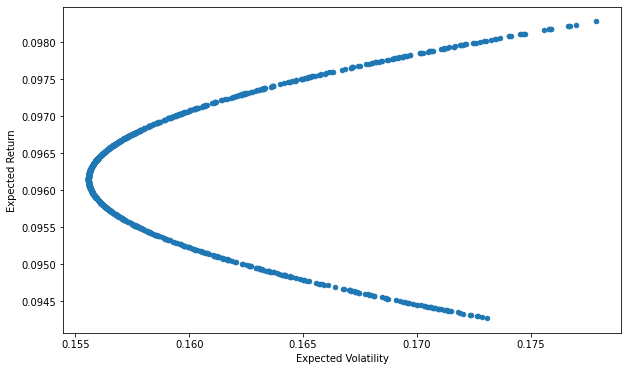

In [56]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

# <font color = 'blue'> The Capital asset Pricing Model



> In CAPM setting, Investors are 
>*   Risk-averse
>*   Prefer higher return
>*   Willing to buy the optimal portfolio

William F. Sharpe introduced the CAPM model. Sharpe introduced the concept of **Market portfolio** which is a bundle of all possible investments in the world i.e. both bonds and stocks. The risk return combination of this portfolio is superior to one of any other portfolio. The expected return of the market portfolio coincides with the expected return of the market. Since its a diversified portfolio, it is optimal interms of risk. The only risk faced by investers is systamatic risk.
<br>
Market Portfolio lies somewhere on the Markowitz Portfolio efficient frontier graph.



> CAPM assumes the existance of a risk-free asset. An investment with zero risk. 

**Why should we assume the risk-free rate has lower expected rate of return?**
<br><font color = 'red'> In efficient markets, investors are only compensated for the added risk they are willing to bear.<font>

=> Depending on their risk preferences, they will choose to buy more of the risk free asset or more of the market portfolio



### BETA
It is one of the main pillers of CAPM. BETA helps us quantify the relationship between security and the overall market portfolio.

The market portfolio comprises of all securities in the market i.e. securitites with
*   High return, High risk
*   Low return, Low risk



> **Safer stocks**: These stocks will earn less than market portfolio when the economy grows and when the economy falls they dont fall very much.
> <br>**Riskier stocks**: Stocks that will earn more than the market portfolio when the economy grows 


<font color = 'green'>*BETA is calculated by the covariance of the stock and the Market divided by the variance of the market.*
</font>


*   BETA = 0 => stock has **no relationship** regarding the Market.
*   BETA < 1 => These are **Defensive stocks**. i.e. if Market does poorly, these stocks typically loose less
*  BETA = 1 => These stocks perform **same way** as Market does.
*  BETA > 1 => These are **Aggressive stocks**; they do better than market when economy is good and falls badly when economy is low.

>> Groceries stores are less dependent on the economic cycle whereas car businesses get impacted more significantly during the economic crisis times.

BETA tells us how risky a stock when compared to the rest of the Market

In [57]:
start = calendar.timegm(datetime.datetime(year = 2012, month = 1, day = 1).timetuple())
end = calendar.timegm(datetime.datetime(year = 2016, month = 12, day = 31).timetuple()) #current epoch time

tickers = ['PG', '%5EGSPC']

data = pd.DataFrame()
data['Date'] = hitYahooFinance('PG', start, end)['Date'] #doing this just for getting the date column
for t in tickers:
  data[t] = hitYahooFinance(t, start, end)['Adj Close']

data.set_index('Date', inplace = True)

In [60]:
sec_returns = np.log(data/ data.shift(1))

cov = sec_returns.cov() * 250
cov

,PG,%5EGSPC
PG,0.020409,0.010078
%5EGSPC,0.010078,0.016362


In [61]:
cov_with_market = cov.iloc[0, 1]
cov_with_market

0.010078087394049943

In [62]:
market_var = sec_returns['%5EGSPC'].var()*250
market_var

0.016361631022038067

### BETA

In [63]:
PG_beta = cov_with_market / market_var
PG_beta

0.6159586034225687

BETA is less than 1 => It is a defensive stock

As per CAPM a securities expected return is given by

$r_{i} = r_{f} + \beta _{im}(r_{m} - r_{f})$
<br>
$r_{f} =$ Retrun on risk free asset
<br>
$\beta _{im} = $ Beta between stock and the Market
<br>
$r_{m} =$ Market return
<br>



> Applying the CAPM in practice 

First, we need to shake of some of th ehypothesis made by the author and use the real life proxies. 

**Risk Free**: There is no shuch thing as risk free. But over time, practitioners approximated with 10-years US government bond yeild: 2.5% as Risk-Free
<br>**BETA** : S&P 500 is wide index and represents Market: 0.62
<br>**Equity Risk Premium** : Historically, it has been between 4.5% and 5.5%

<br> $r_{i}$ = 2.5%+0.62*5% = 5.6%




Calculate the expected return of P&G (CAPM):<br>
$r_{PG} = r_{f} + \beta _{PG}(r_{m} - r_{f})$

<br> we can get the approximation of risk free rate from bloombergs webiste

In [64]:
PG_er = 0.025+PG_beta*0.05
PG_er

0.05579793017112844

This is the return on Investment a person would expect when buying a P&G stock

### Sharpe Ratio
<br> It helps the investors to compare stocks interms of risk return performance.

<br> Sharpe Ratio = $\frac{r_{i} - r_{f}}{\sigma _{i}}$
<br> $r_{f}$ is risk-free rate
<br> $r_{i}$ is rate of return of the stock 'i'
<br> $\sigma _{i}$ is the standard deviation of the stock 'i'

In [65]:
sharpe = (PG_er -0.025)/ (sec_returns['PG'].std()* 250 **0.5)
sharpe 

0.2155810794702579